In [1]:
#Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

#### Design a query to retrieve the last 12 months of precipitation data from the recent date and plot the results.
 

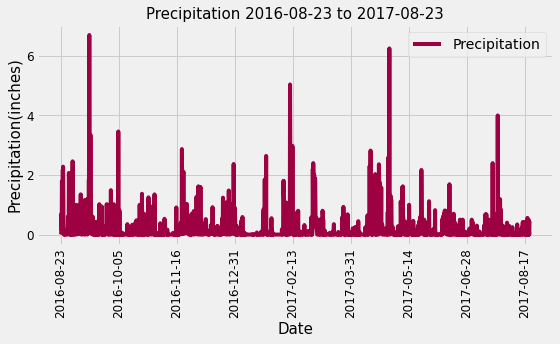

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
#********************************************************************************************

# Starting from the most recent data point in the database. 
#convert string date to date format
recent_date = (dt.datetime.strptime(recent_date, "%Y-%m-%d")).date()
#********************************************************************************************
# Calculate the date one year from the last date in data set.
one_yearago_date = recent_date - dt.timedelta(days=365)
#********************************************************************************************
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
            filter((Measurement.date >= one_yearago_date)\
            & (Measurement.date <= recent_date)).all()
#********************************************************************************************
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data)
prcp_df.set_index('date', inplace = True)
#*********************************************************************************************
#Rename the prcp column in the datefarme to precipitation
prcp_df.rename(columns={'prcp':'Precipitation'}, inplace=True)
#*********************************************************************************************
# check for null values in the precipitation column
prcp_df["Precipitation"].isnull().sum()
#**********************************************************************************************
#Drop all the null values
clean_df = prcp_df.dropna(axis=0, how="any",inplace=False)
#**********************************************************************************************
# Sort the dataframe by date
clean_df = clean_df.sort_values("date")
#**********************************************************************************************
##########################
# Plotting with matplotlib
##########################
clean_df.plot(figsize=(8,5),rot=90, fontsize = 12, colormap = 'Spectral')
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Precipitation(inches)',fontsize = 15)
plt.title(f"Precipitation {one_yearago_date} to {recent_date}", fontsize = 15)
plt.savefig("Images/Precipitation.png")
plt.tight_layout()
plt.show()


In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset
Total_stations = session.query(Station.id).count()
print(f"There are {Total_stations} stations in the dataset")

There are 9 stations in the dataset


In [12]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.station)).\
          group_by(Measurement.station).\
          order_by(func.count(Measurement.station).desc()).all()
for result in results:
    print(f"{result[0]} - {result[1]}")

USC00519281 - 2772
USC00519397 - 2724
USC00513117 - 2709
USC00519523 - 2669
USC00516128 - 2612
USC00514830 - 2202
USC00511918 - 1979
USC00517948 - 1372
USC00518838 - 511


In [16]:
# Finding the station id of the most active station
active_station_id = session.query(Station.id).filter(Station.station == "USC00519281").first()[0]
active_station_id
print(f"Most acitive station id is number:{active_station_id}")

Most acitive station id is number:7


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
outcome = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                        filter(Measurement.station == "USC00519281").all()
print(f"Lowest Temperature of station id 'USC00519281' is '{outcome[0][0]}'")
print(f"Highest Temperature of station id 'USC00519281'  is '{outcome[0][1]}'")
print(f"Average Temperature of station id 'USC00519281' '{round(outcome[0][2],3)}'")

Lowest Temperature of station id 'USC00519281' is '54.0'
Highest Temperature of station id 'USC00519281'  is '85.0'
Average Temperature of station id 'USC00519281' '71.664'


#### Histogram of the temperature observation between 2016-08-23 to 2017-08-23

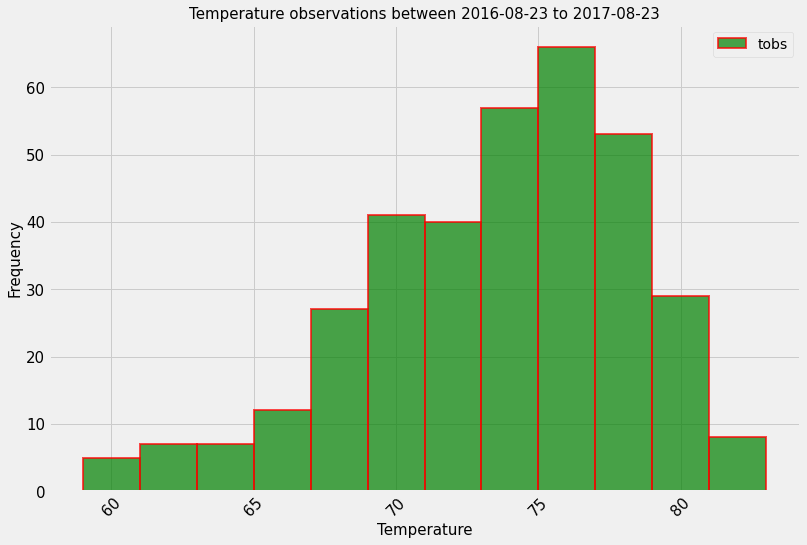

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).\
            filter((Measurement.date >= one_yearago_date)\
                    & (Measurement.date <= recent_date)).\
            filter(Measurement.station == "USC00519281").all()
#***************************************************************************************************************
# Save the query results as a Pandas DataFrame
temp_df = pd.DataFrame(temp_data)
#***************************************************************************************************************
# Plot the results as a histogram with `bins=12`
temp_df['tobs'].plot(kind='hist',
        alpha=0.7,
        bins=12,                              
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15,
        legend = True,
        color = 'green',
        edgecolor='r',
        linewidth=2)    
plt.title(f"Temperature observations between {one_yearago_date} to {recent_date}", fontsize = 15)
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.savefig("Images/Station.hitogram.png")
plt.tight_layout
plt.show()

# Close session

In [19]:
session.close()